[]

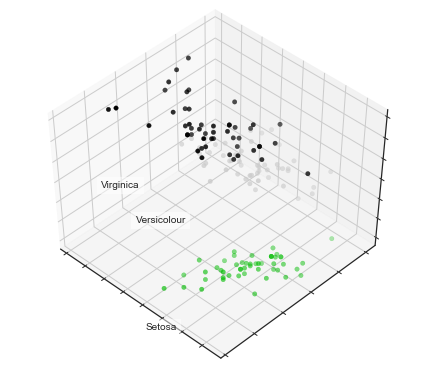

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Загрузим наши ириски
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Заведём красивую трёхмерную картинку
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Поменяем порядок цветов меток, чтобы они соответствовали правильному
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, cmap=plt.cm.spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Выделим из наших данных валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

# Для примера возьмём неглубокое дерево решений
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.88889


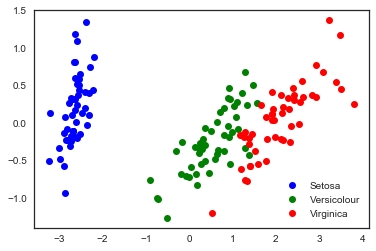

In [3]:
# Прогоним встроенный в sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# И нарисуем получившиеся точки в нашем новом пространстве
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

In [4]:
# Повторим то же самое разбиение на валидацию и тренировочную выборку.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.91111


In [5]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

1 component: 92.46% of initial variance
0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
2 component: 5.3% of initial variance
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.176 x petal length (cm) + -0.075 x petal width (cm)


In [6]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

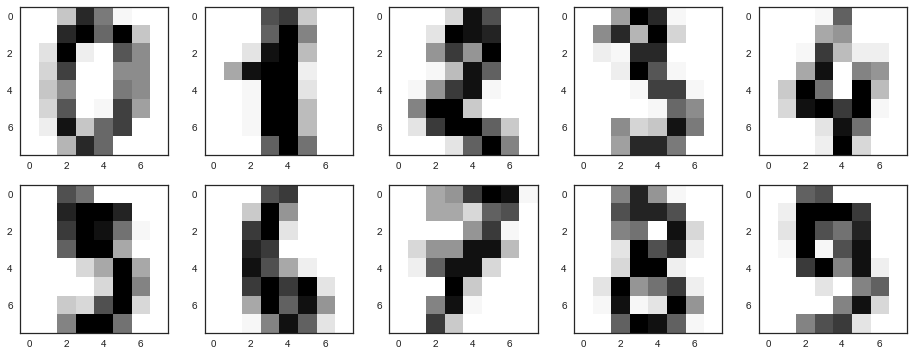

In [7]:
# f, axes = plt.subplots(5, 2, sharey=True, figsize=(16,6))
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

Projecting 64-dimensional data to 2D


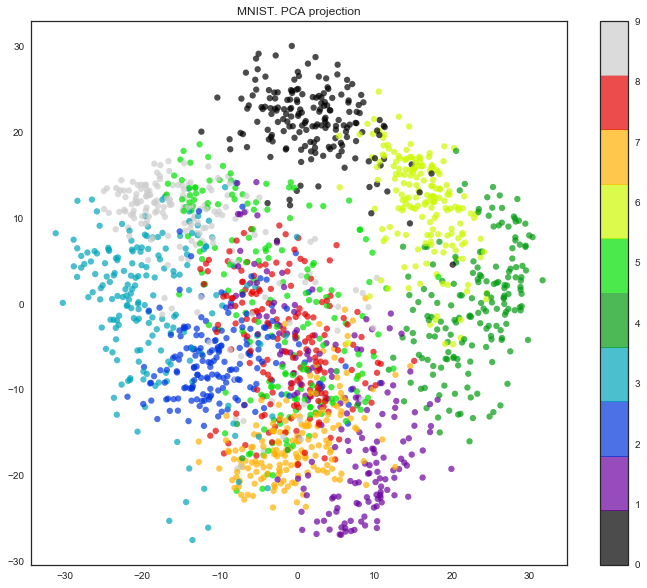

In [8]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

Wall time: 1min 30s


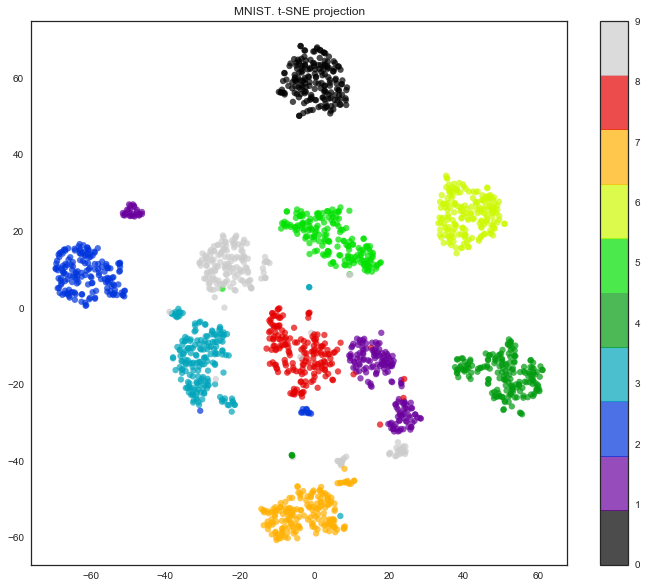

In [9]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

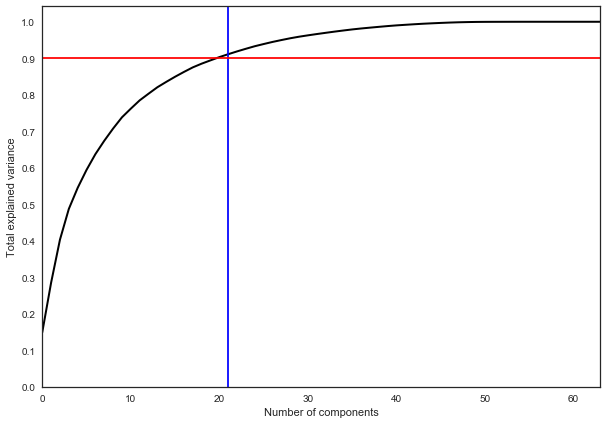

In [10]:
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

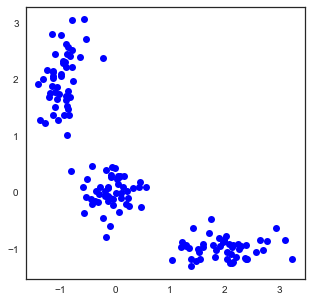

In [11]:
# Начнём с того, что насыпем на плоскость три кластера точек
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo');

In [13]:
# В scipy есть замечательная функция, которая считает расстояния
# между парами точек из двух массивов, подающихся ей на вход
from scipy.spatial.distance import cdist

# Прибьём рандомность и насыпем три случайные центроиды для начала
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Считаем расстояния от наблюдений до центроид
    distances = cdist(X, centroids)
    # Смотрим, до какой центроиде каждой точке ближе всего
    labels = distances.argmin(axis=1)

    # Положим в каждую новую центроиду геометрический центр её точек
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)

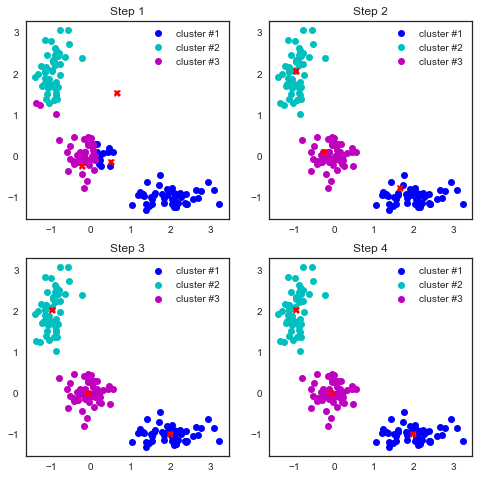

In [14]:
# А теперь нарисуем всю эту красоту
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

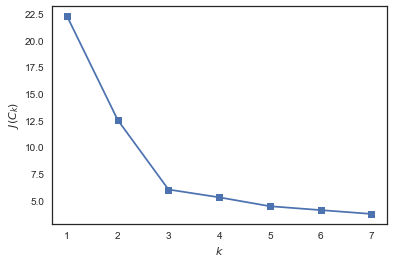

In [15]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

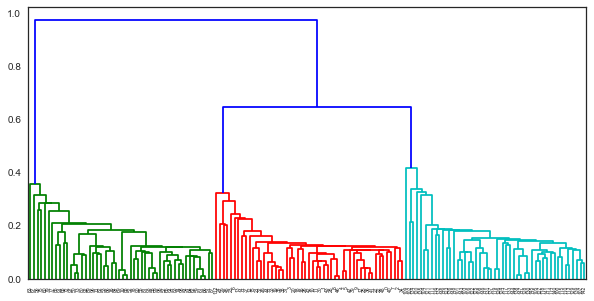

In [16]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

In [17]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

data = datasets.load_digits()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.662295,0.732799,0.735448,0.742972,0.739191,0.182097
Affinity,0.175174,0.451249,0.958907,0.486901,0.645857,0.115197
Spectral,0.752639,0.827818,0.829544,0.876367,0.852313,0.182195
Agglomerative,0.794003,0.856085,0.857513,0.879096,0.868170,0.178497


# СТАРТУЕМ!!!!

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [19]:


X_train = np.loadtxt("C:\Users\User\Desktop\samsung_train.txt")
y_train = np.loadtxt("C:\Users\User\Desktop\samsung_train_labels.txt").astype(int)

X_test = np.loadtxt("C:\Users\User\Desktop\samsung_test.txt")
y_test = np.loadtxt("C:\Users\User\Desktop\samsung_test_labels.txt").astype(int)



In [25]:
X= np.vstack((X_train,X_test))

In [33]:
Y =np.hstack((y_train, y_test))

In [35]:
np.unique(Y)


array([1, 2, 3, 4, 5, 6])

In [36]:
n_classes = np.unique(y).size

In [37]:
n_classes

10

In [38]:
from sklearn.preprocessing import StandardScaler

# Ваш код здесь
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [39]:
X_scaled.shape

(10299L, 561L)

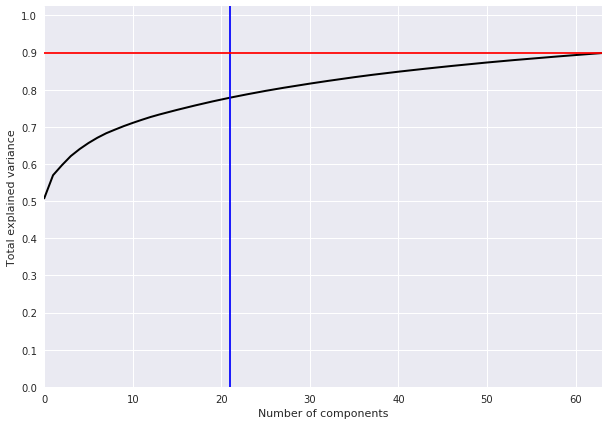

In [40]:
pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [43]:
pca = decomposition.PCA(n_components=66)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [47]:

s=0;
for i, component in enumerate(pca.components_):
    s=s+ pca.explained_variance_ratio_[i];
    print("{} component: {}% of initial variance, ALL {}".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2), s))
   

    

1 component: 50.74% of initial variance, ALL 0.50738221035
2 component: 6.24% of initial variance, ALL 0.569774068102
3 component: 2.69% of initial variance, ALL 0.596699706729
4 component: 2.45% of initial variance, ALL 0.621228416403
5 component: 1.89% of initial variance, ALL 0.640117772977
6 component: 1.63% of initial variance, ALL 0.656431727008
7 component: 1.41% of initial variance, ALL 0.670577059363
8 component: 1.22% of initial variance, ALL 0.682739165358
9 component: 0.99% of initial variance, ALL 0.692591640664
10 component: 0.95% of initial variance, ALL 0.702083922449
11 component: 0.86% of initial variance, ALL 0.710666957785
12 component: 0.81% of initial variance, ALL 0.718766755827
13 component: 0.77% of initial variance, ALL 0.726425380287
14 component: 0.68% of initial variance, ALL 0.733192050841
15 component: 0.63% of initial variance, ALL 0.73949446026
16 component: 0.62% of initial variance, ALL 0.745651623841
17 component: 0.6% of initial variance, ALL 0.7516

In [58]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)



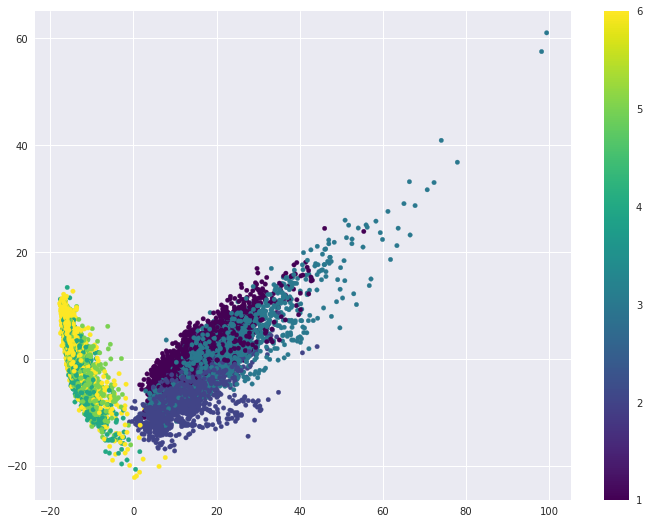

In [67]:
#plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y, s=20,cmap='viridis')
plt.colorbar()


# Ваш код здесь
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap='viridis');



In [86]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=1, n_init=100).fit(X_pca)
   

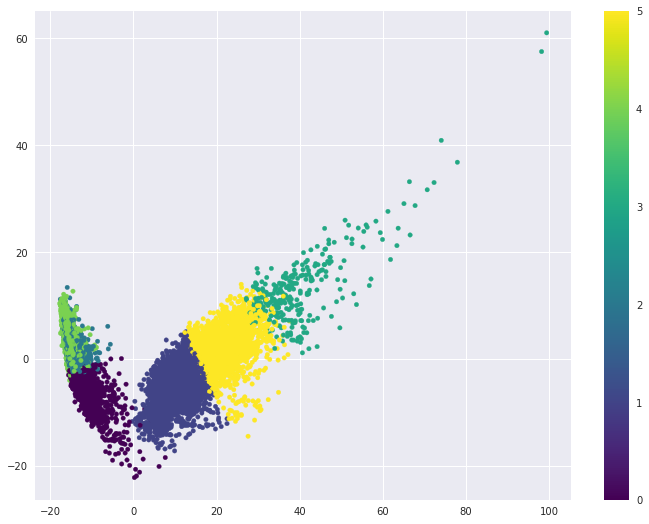

In [87]:


# Ваш код здесь
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, s=20,  cmap='viridis');
plt.colorbar()



In [89]:


tab = pd.crosstab(Y, cluster_labels, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']
tab



,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все
ходьба,0,742,903,0,0,77,1722
подъем вверх по лестнице,0,295,1242,2,0,5,1544
спуск по лестнице,0,889,321,0,0,196,1406
сидение,1234,0,1,451,91,0,1777
стояние,1340,0,0,566,0,0,1906
лежание,53,0,5,330,1556,0,1944
все,2627,1926,2472,1349,1647,278,10299


In [80]:
903/1722.0

0.524390243902439

In [81]:
1242/1544.0

0.8044041450777202

In [82]:
889/1406.0

0.6322901849217639

In [83]:
1234/1777.0

0.6944288126055149

In [84]:
1340/1906.0

0.7030430220356768

In [85]:
1556/1944.0

0.8004115226337448

In [ ]:


# Ваш код здесь
inertia = []
for k in tqdm_notebook(range(1, n_classes + 1)):

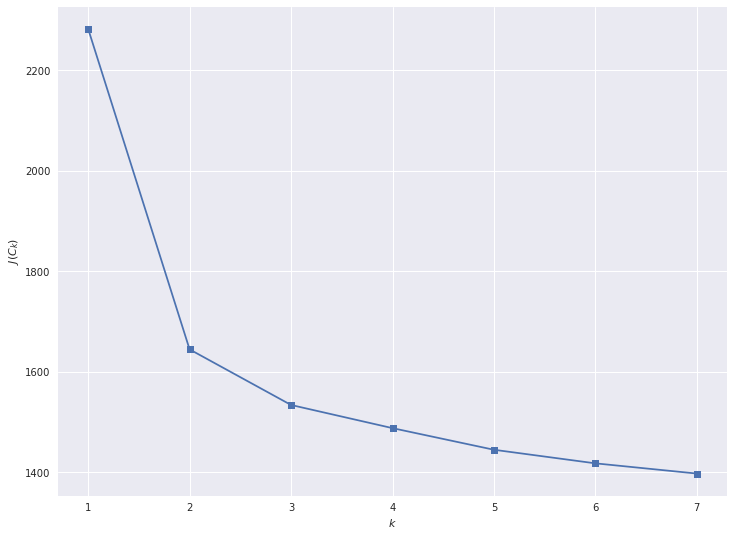

In [90]:


inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [91]:
ag = AgglomerativeClustering(n_clusters=2, 
                             linkage='ward').fit(X_pca)

In [92]:
from sklearn.metrics import adjusted_rand_score
print (adjusted_rand_score(Y, kmeans.labels_))
print (adjusted_rand_score(Y, ag.labels_))

0.43423784276
0.332532207155


In [93]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Ваш код здесь
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 




# Ваш код здесь





In [94]:
svc = LinearSVC(random_state=1)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}



In [126]:
clf = GridSearchCV(svc, svc_params)
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [97]:
clf.best_params_

{'C': 0.1}

In [124]:
best_svc = LinearSVC(C=0.1, random_state=1)

In [127]:
clf.best_score_

0.93824809575625678

In [125]:
best_svc.fit(X_train_scaled,y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
     verbose=0)

In [102]:
y_predicted = best_svc.predict(X_test_scaled)

In [103]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 
             'сидение', 'стояние', 'лежание', 'все']
tab.columns = tab.index
tab

,ходьба,подъем вверх по лестнице,спуск по лестнице,сидение,стояние,лежание,все
ходьба,494,2,0,0,0,0,496
подъем вверх по лестнице,12,459,0,0,0,0,471
спуск по лестнице,2,4,413,1,0,0,420
сидение,0,4,0,426,61,0,491
стояние,0,0,0,15,517,0,532
лежание,0,0,0,0,11,526,537
все,508,469,413,442,589,526,2947


In [104]:
494/496.0

0.9959677419354839

In [105]:
459/471.0

0.9745222929936306

In [106]:
413/420.0

0.9833333333333333

In [107]:
426/491.0

0.8676171079429735

In [108]:
517/532.0

0.9718045112781954

In [109]:
526/537.0

0.9795158286778398

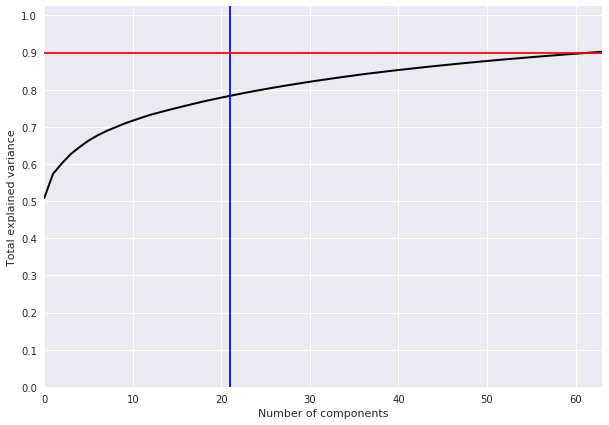

In [110]:
pca = decomposition.PCA().fit(X_train_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [111]:
s=0;
for i, component in enumerate(pca.components_):
    s=s+ pca.explained_variance_ratio_[i];
    print("{} component: {}% of initial variance, ALL {}".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2), s))
   

1 component: 50.78% of initial variance, ALL 0.507811722913
2 component: 6.58% of initial variance, ALL 0.573618525581
3 component: 2.81% of initial variance, ALL 0.601682893328
4 component: 2.5% of initial variance, ALL 0.626722420783
5 component: 1.89% of initial variance, ALL 0.645605270931
6 component: 1.72% of initial variance, ALL 0.662845335092
7 component: 1.37% of initial variance, ALL 0.676555449778
8 component: 1.2% of initial variance, ALL 0.688546226574
9 component: 1.0% of initial variance, ALL 0.698504821683
10 component: 0.97% of initial variance, ALL 0.708155687587
11 component: 0.86% of initial variance, ALL 0.716756204077
12 component: 0.8% of initial variance, ALL 0.724759013575
13 component: 0.76% of initial variance, ALL 0.732398977261
14 component: 0.65% of initial variance, ALL 0.738852266501
15 component: 0.63% of initial variance, ALL 0.745175509965
16 component: 0.6% of initial variance, ALL 0.751172730869
17 component: 0.59% of initial variance, ALL 0.757040

137 component: 0.05% of initial variance, ALL 0.975023900198
138 component: 0.05% of initial variance, ALL 0.975529075311
139 component: 0.05% of initial variance, ALL 0.976031295707
140 component: 0.05% of initial variance, ALL 0.976520201948
141 component: 0.05% of initial variance, ALL 0.977005121794
142 component: 0.05% of initial variance, ALL 0.977479806833
143 component: 0.05% of initial variance, ALL 0.977949392091
144 component: 0.05% of initial variance, ALL 0.978410510874
145 component: 0.05% of initial variance, ALL 0.978870814675
146 component: 0.05% of initial variance, ALL 0.979321064276
147 component: 0.04% of initial variance, ALL 0.979763758396
148 component: 0.04% of initial variance, ALL 0.980201406928
149 component: 0.04% of initial variance, ALL 0.98063110069
150 component: 0.04% of initial variance, ALL 0.98105373335
151 component: 0.04% of initial variance, ALL 0.981469943094
152 component: 0.04% of initial variance, ALL 0.981878974435
153 component: 0.04% of in

271 component: 0.0% of initial variance, ALL 0.998345552288
272 component: 0.0% of initial variance, ALL 0.998378098541
273 component: 0.0% of initial variance, ALL 0.9984102458
274 component: 0.0% of initial variance, ALL 0.998441996645
275 component: 0.0% of initial variance, ALL 0.99847300687
276 component: 0.0% of initial variance, ALL 0.998503443105
277 component: 0.0% of initial variance, ALL 0.998532814436
278 component: 0.0% of initial variance, ALL 0.998562017107
279 component: 0.0% of initial variance, ALL 0.99859082547
280 component: 0.0% of initial variance, ALL 0.998618788513
281 component: 0.0% of initial variance, ALL 0.998646706827
282 component: 0.0% of initial variance, ALL 0.998674330451
283 component: 0.0% of initial variance, ALL 0.998701153373
284 component: 0.0% of initial variance, ALL 0.998727402224
285 component: 0.0% of initial variance, ALL 0.998753384638
286 component: 0.0% of initial variance, ALL 0.998779112687
287 component: 0.0% of initial variance, ALL

407 component: 0.0% of initial variance, ALL 0.999981374531
408 component: 0.0% of initial variance, ALL 0.999982300697
409 component: 0.0% of initial variance, ALL 0.999983195771
410 component: 0.0% of initial variance, ALL 0.999984060664
411 component: 0.0% of initial variance, ALL 0.999984877607
412 component: 0.0% of initial variance, ALL 0.999985661458
413 component: 0.0% of initial variance, ALL 0.99998641257
414 component: 0.0% of initial variance, ALL 0.999987136211
415 component: 0.0% of initial variance, ALL 0.999987845996
416 component: 0.0% of initial variance, ALL 0.999988528079
417 component: 0.0% of initial variance, ALL 0.999989202407
418 component: 0.0% of initial variance, ALL 0.999989842209
419 component: 0.0% of initial variance, ALL 0.999990460655
420 component: 0.0% of initial variance, ALL 0.999991059249
421 component: 0.0% of initial variance, ALL 0.999991640217
422 component: 0.0% of initial variance, ALL 0.999992205659
423 component: 0.0% of initial variance, 

560 component: 0.0% of initial variance, ALL 1.0
561 component: 0.0% of initial variance, ALL 1.0


In [114]:
pca = decomposition.PCA(n_components=63, random_state=1)
X_r_train = pca.fit_transform(X_train_scaled)

In [115]:
X_r_test=pca.transform(X_test_scaled)

In [116]:
svc = LinearSVC(random_state=1)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [117]:
clf = GridSearchCV(svc, svc_params)
clf.fit(X_r_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [118]:
clf.best_params_

{'C': 0.1}

In [119]:
best_svc = LinearSVC(C=0.1, random_state=1)

In [122]:
best_svc.fit(X_r_train,y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
     verbose=0)

In [123]:
clf.best_score_

0.89853101196953211